In [1]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce
import gsp_lib.util as gsp_util

# fig 2 gaussian
import seaborn as sns
import matplotlib.colors as cm
from matplotlib.colors import ListedColormap

from wavelets_designs import app_gsp_filter

import warnings
warnings.filterwarnings('ignore')
import networkx as nx

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style("whitegrid")


In [95]:
 def plot_function_stem(G, posx, fs, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    markerline, stemlines, baseline = plt.stem(posx, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 1.5) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1) 
    plt.setp(baseline, 'color', '#333333', 'linewidth', 1) 
    plt.ylim(lims)

def plot_function(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    margin = .02
    posx = [pos[n][0] for n in G.nodes()]
    plot_function_stem(G, posx, fs, [lims[0]-margin, lims[1]+margin])
    plot_function_color(G, pos, fs, cmap, lims)
#     plt.gca().set_aspect('equal', 'datalim')

#     plt.xticks([])

In [9]:
def comet_graph(N=64, center_degree=30):
    
    comet_graph = nx.Graph()
    comet_graph.add_nodes_from(range(N))
    
    for i in range(1,center_degree+1):
        comet_graph.add_edge(0,i)
        
    for i in range(center_degree,N-1):
        comet_graph.add_edge(i,i+1)
    
    circle = [(5*np.cos(2*np.pi/center_degree*x),5*np.sin(2*np.pi/center_degree*x)) for x in range(0,center_degree+1)]
        
    position = []
    ind = 6.5
    for i in range(N):
        if i == 0:
            position.append((0,0))
        if (1 <= i) and (i <= center_degree):
            position.append(circle[i])
        if ((center_degree + 1) <= i):
            position.append((ind,0))
            ind += 1.5
                
    return comet_graph, position


n_nodes = 64 

G, pos = comet_graph(n_nodes, 30)

L, S, U = gsp_util.get_fourier_base(G, 'unnormalized')
L = np.array(L, dtype=float)
S = np.linalg.eigvalsh(L)

In [88]:
fiedler_order = np.argsort(U[:,1])[::-1]
fiedler_order = list(range(1,30)) + [0] + list(range(30,n_nodes))

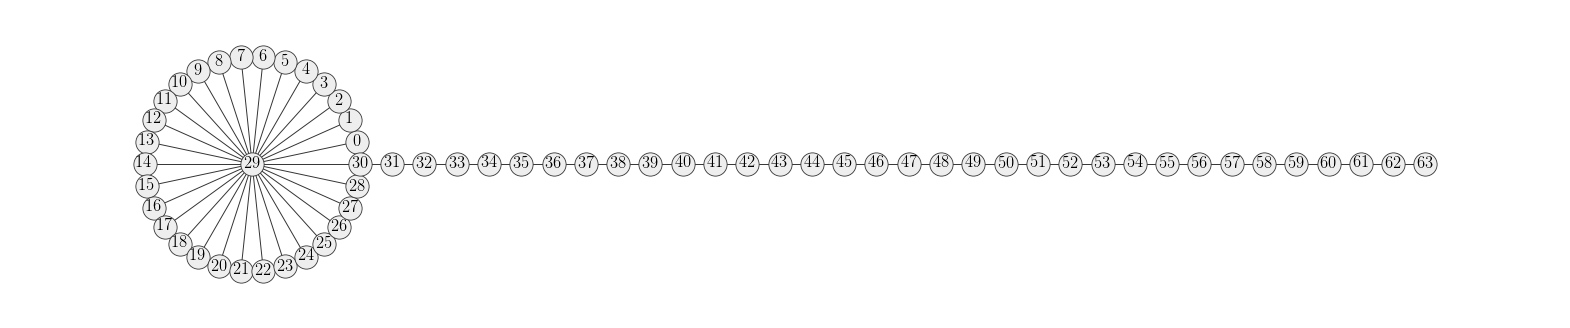

In [110]:
plt.figure(figsize=(20,4))

labels = {fiedler_order[i]: i for i in range(n_nodes)}

nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color='#eeeeee', node_size=280, 
                               linewidths=.6)
nx.draw_networkx_labels(G, pos, labels=labels)
nodes.set_edgecolor('#333333')
# plt.ylim([-10,10])
# plt.xlim([-1,n_nodes])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.axis('off')
# plt.savefig('path_graph.pdf', bbox_inches='tight')
plt.show()

In [53]:
from importlib import reload
reload(app_gsp_filter)

<module 'wavelets_designs.app_gsp_filter' from '/Users/pao/doc/jupyter_figs/wavelets_designs/app_gsp_filter.py'>

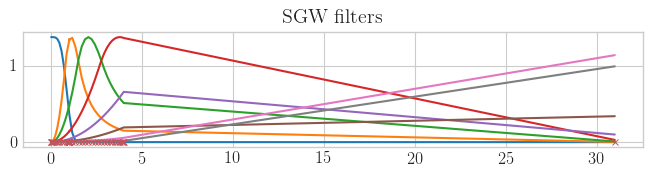

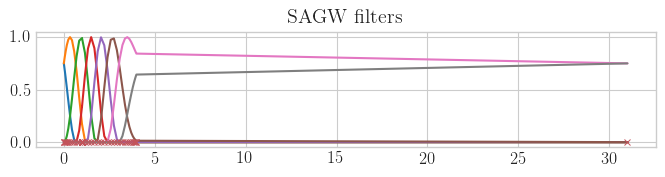

In [113]:
def plot_stem_f(G, f, pos, cmap):
    n_nodes = G.number_of_nodes()
    flims = [min(f), max(f)]
    plt.figure(figsize=(10,2))
    plot_function(G, pos, f, cmap, lims=flims)
    #     plt.axis('off')
    plt.xticks([])
    plt.xlim([-1,n_nodes])
    sns.despine(left=True, bottom=True)
    
    
def plot_filters(lam, filters):
    plt.figure(figsize=(8, 1.5))
    
    n = lam.shape[0]
    for filt in filters:
        z = np.zeros((n,))
        for l in range(n):
            z[l] = filt(lam[l])
        plt.plot(lam, z)
    plt.plot(lam, [0]*lam.size, 'x', color='#C3535A', markersize=4, mew=.7,zorder=2)


###########
# Graph Function
###########

flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))

# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=12)

n_scales = 8

w, _,lam,filters = app_gsp_filter.app_gsp_filter(U[:,1], L, n_nodes, n_scales, M=40, 
                                     filter_type='spectral_graph_wavelet')
plot_filters(S, filters)
plt.title('SGW filters')
plt.savefig('comet_graph_sgw.pdf',bbox_inches='tight')
plt.show()


w, _,lam,filters = app_gsp_filter.app_gsp_filter(U[:,1], L, n_nodes, n_scales, M=40, 
                                                 filter_type='warped_translates_mono_cubic')
plot_filters(S, filters)
plt.title('SAGW filters')
plt.savefig('comet_graph_sagw.pdf',bbox_inches='tight')
plt.show()
    
   

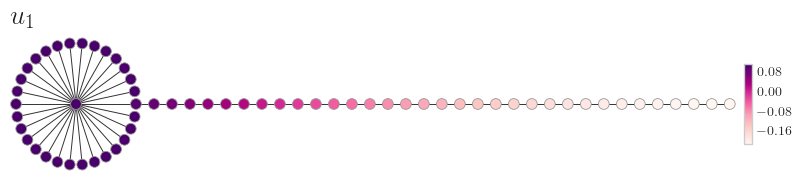

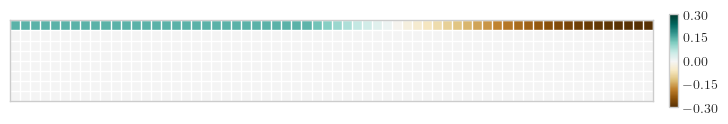

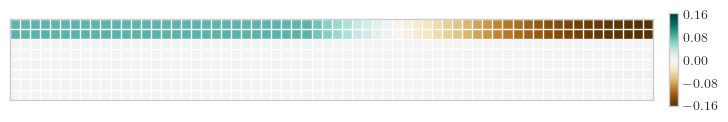

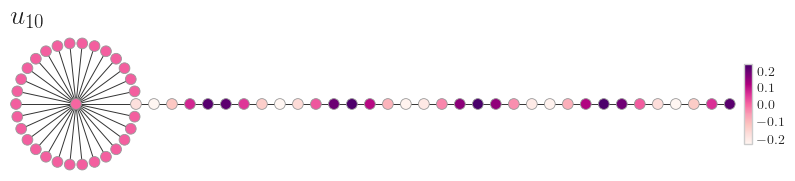

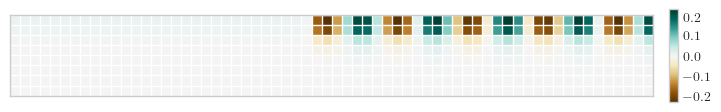

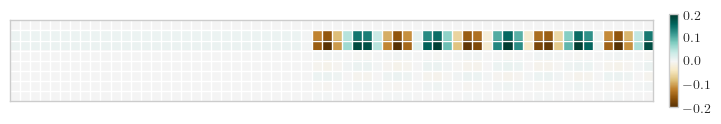

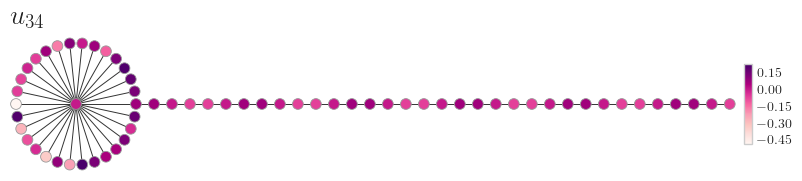

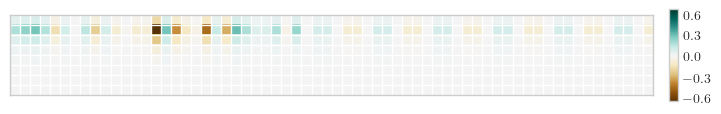

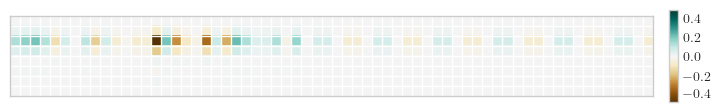

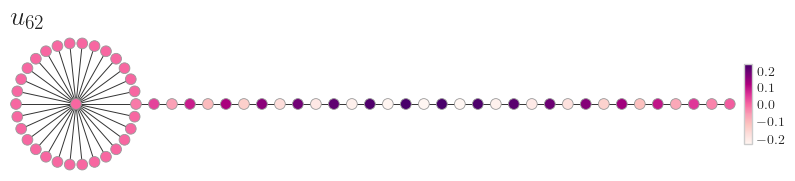

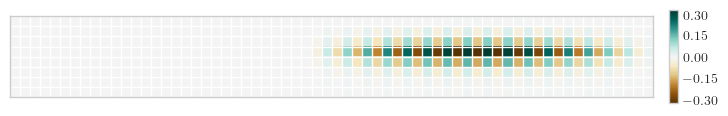

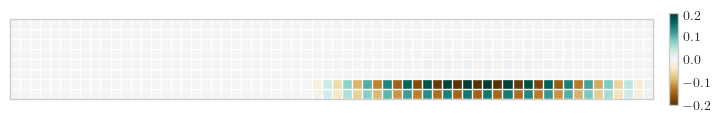

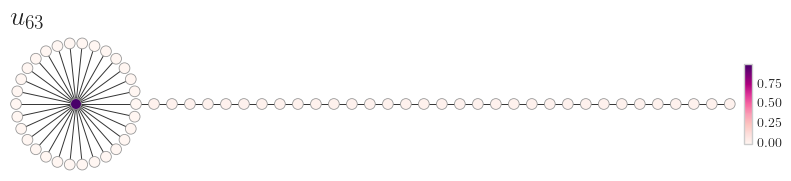

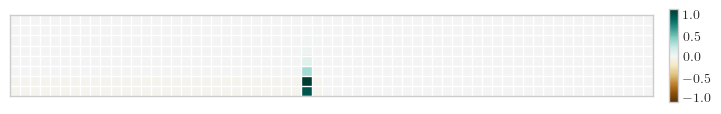

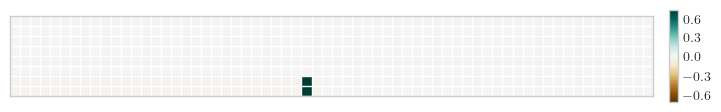

In [132]:
from matplotlib import ticker

def plot_function_color(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    # cmap = ListedColormap(sns.color_palette('Spectral_r', 255)[0:])
#     cmap = sns.cubehelix_palette(as_cmap=True)
    
    nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
    nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=fs, node_size=60, 
                                   cmap=cmap, linewidths=.6, vmin=lims[0], vmax=lims[1])
    nodes.set_edgecolor('#999999')
    nodes.set_zorder(8)
    
    return nodes

def plot_gr(G, pos, fs, cmap):
    plt.figure(figsize=(9,1.7))

    nodes = plot_function_color(G, pos, fs, cmap)        
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.xlim([-5.5,55])
    plt.ylim([-5.5,5.5])
#     sns.despine(left=True, bottom=True)
    cb = plt.colorbar(nodes, orientation="vertical",  shrink=.6, aspect=10, pad=0.01)
    cb.ax.tick_params(labelsize=10)
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()
    plt.tight_layout()
    
def plot_wavs_mat(w):
    cmap = ListedColormap(sns.color_palette('BrBG', 255))
    max_value = np.max(np.abs(w))
    lims = [-max_value, max_value]

    n_scales, n_nodes = w.shape
    plt.figure(figsize=(10,2))

    plt.imshow(w, interpolation='none', vmin=lims[0], vmax=lims[1], cmap=cmap)
    cb = plt.colorbar(orientation="vertical",  shrink=.6, aspect=10, pad=0.02)
    cb.ax.tick_params(labelsize=10)
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()
    
    ax = plt.gca()
    
    # Major ticks
    ax.set_xticks([]);
    ax.set_yticks([]);

    ax.set_xticks(np.arange(-.5, n_nodes, 1), minor=True);
    ax.set_yticks(np.arange(-.5, n_scales, 1), minor=True);
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    
    
cmap = ListedColormap(sns.color_palette('RdPu', 255))
u_list = [1, 10, 34, 62, 63]

for l in u_list:
    fs = np.array(U[:,l])
    plot_gr(G, pos, fs, cmap)
    plt.title('$u_{{ {} }}$'.format(l), loc='left', fontsize=20)
    plt.savefig('comet_u{}.pdf'.format(l), bbox_inches='tight')
    plt.show()

    w, _,lam,filters = app_gsp_filter.app_gsp_filter(fs, L, n_nodes, n_scales, M=40, 
                                         filter_type='spectral_graph_wavelet')
    
    plot_wavs_mat(w[:,fiedler_order])
#     plt.title('SGW $u_{{ {} }}$'.format(l), loc='left', fontsize=20)
    plt.savefig('comet_u{}_sgw.pdf'.format(l), bbox_inches='tight')
    plt.show()
    
    
    w, _,lam,filters = app_gsp_filter.app_gsp_filter(fs, L, n_nodes, n_scales, M=40, 
                                                     filter_type='warped_translates_mono_cubic')
    
    plot_wavs_mat(w[:,fiedler_order])
#     plt.title('SAGW $u_{{ {} }}$'.format(l), loc='left', fontsize=20)
    plt.savefig('comet_u{}_sagw.pdf'.format(l), bbox_inches='tight')
    plt.show()

In [ ]:
flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))


# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=16)

l='3_63'
fs = np.array(U[:,63])
fs[32:] = np.array(U[32:,62])*2
# fs = np.random.rand(n_nodes)*2-1


plot_gr(G, pos, fs, cmap)

plt.title('$f_{{ {} }}$'.format(0), loc='left', fontsize=20)
plt.savefig('comet_f0.pdf'.format(l), bbox_inches='tight')
plt.show()

w, _,lam,filters = app_gsp_filter.app_gsp_filter(fs, L, n_nodes, n_scales, M=40, filter_type='spectral_graph_wavelet')

plot_wavs_mat(w)
plt.savefig('comet_f0.pdf'.format(l), bbox_inches='tight')
plt.show()

w, _,lam,filters = app_gsp_filter.app_gsp_filter(fs, L, n_nodes, n_scales, M=40, 
                                                     filter_type='warped_translates_mono_cubic')
    
plot_wavs_mat(w)
plt.savefig('comet_f0.pdf'.format(l), bbox_inches='tight')
plt.show()

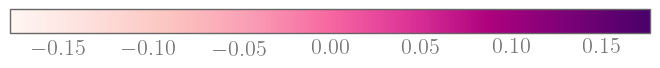

In [95]:

cb_arr = [np.linspace(flims[0], flims[1], 256)]

plt.figure(figsize=(8, .4))

cb_img = plt.imshow(cb_arr, cmap=cmap)
plt.gca().set_visible(False)

cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cb = plt.colorbar(orientation="horizontal", cmap=cmap, cax=cax)

cb.outline.set_edgecolor('#666666')
cb.ax.tick_params(axis='both', colors='#777777')
plt.savefig('path_cbar.pdf', bbox_inches='tight')
plt.show()



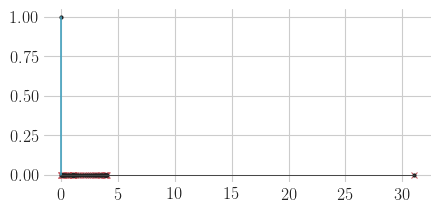

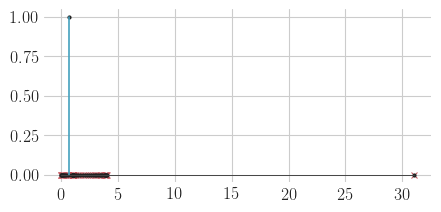

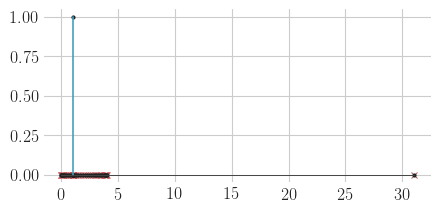

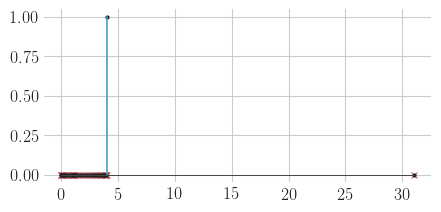

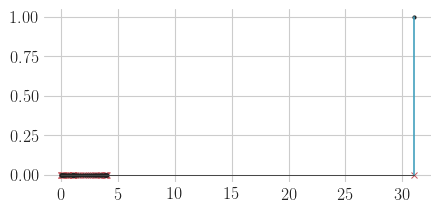

In [42]:
# sns.set_style("white")
for l in u_list:
    fs = np.array(U[:,l])
    fst = np.dot(U.T, fs)
    
    plt.figure(figsize=(5,2.25))
    plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
    markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
    plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
#     plt.savefig('path_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
    # plt.axis('off')
    sns.despine(left=True, bottom=True)

    plt.show()

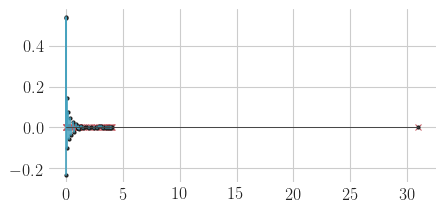

In [40]:
fs = np.array(U[:,3])
fs[32:] = np.array(U[32:,1])

fst = np.dot(U.T, fs)
    
plt.figure(figsize=(5,2.25))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
plt.savefig('path_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()

In [ ]:
U